In [47]:
from Bio import AlignIO 
import matplotlib.pyplot as plt 
import numpy as np 
import os 

#Load alignment 
aln = AlignIO.read(os.path.normpath('./data/fastas-by-clade/CUG-Ala_aligned_CHCs.fasta'), 'fasta') 

aa_list = 'RHKDESTNQCUGPAVILMFYW-' 

key_res_dict = {
    'K1326': 3257, # Moved back 1 due to Python indexing
    'K1415': 3346 # Moved back 1
}

In [48]:
def aa_from_alignment(aln, aa_list, key_res_dict):
    n_rows = len(aln)  
    n_cols = len(aa_list) #len(key_res_dict)
    #aa_len = len(aa_list)
   
    cons_data_all = {}  #np.zeros((n_rows, n_cols * aa_len), dtype=int)

    print(f"Alignment has {n_rows} rows and {n_cols} key residues.") 
    
    for key_res, key_res_ind in key_res_dict.items():

        columns = aln[:, key_res_ind]
        
        cons_data_key_res = np.zeros((n_rows,n_cols),dtype=int)
        
        #print(f"Key residue {jj} ({key_res}) at index {key_res_ind}: {column}")

        for ii, aa in enumerate(columns):
            for kk, aa_key in enumerate(aa_list):
                if aa == aa_key:
                    cons_data_key_res[ii, kk] = 1
                    #print(f"Binary row for key residue {jj} ({key_res}): {cons_data_all[:, jj * aa_len:(jj + 1) * aa_len]}") 

        cons_data_all[key_res] = cons_data_key_res

    return cons_data_all




Alignment has 5 rows and 22 key residues.


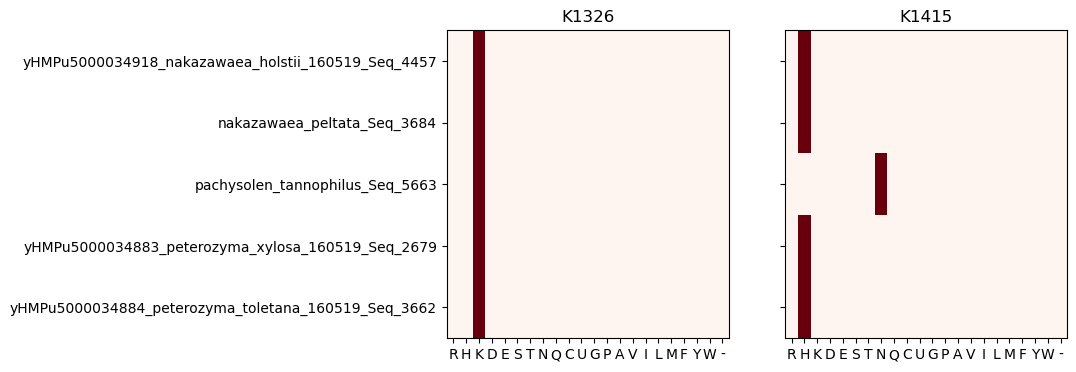

In [49]:

protein_list = []
for record in aln:
    protein_list.append(record.id)

cons_data_all = aa_from_alignment(aln, aa_list, key_res_dict)

#Plot Conservation of Residue 
fig, axarr = plt.subplots(1,2, figsize=(8,4), sharey=True) 


for jj, (key_res, key_res_ind) in enumerate(key_res_dict.items()):




    #key_res_mapping = cat_res_map_filt.loc[cat_res_map_filt['HSU1']==key_res,:]  
     
    
    
     
    #aln_ind = int(key_res_mapping[diverse_yeast_alignment.fasta])
       
    #Make this a matrix of 1 / 0 for each species on the row and each AA on the column 
    # def aa_from_alignment(diverse_yeast_alignment, aa_list): 
    #     cons_data_all = [] 
    #     with open (diverse_yeast_alignment, 'r') as file:  
    #         for key_res in file: 
    #             aa = line.strip() 
    #             species = [1 if aa == 1 else 0 for aa in aa_list]
    # return matrix 
     
    # def display_matrix(cons_all_data): 
    #     for species in matrix: 
    #         print(species) 
     
     
    # #For making continuous conservation scores from groups of sequences   
    # #for msa_group_name, (msa_dir, sc_index, sc_index_genename) in msa_groups.items(): 
    # #    mapping = aln_coord_map[sc_index] 
    #  #   mapped_ind = mapping[int(aln_ind-1)] 
    #   #  if mapped_ind == '-':  
    #    #     mapped_data = pd.Series([0]*len(aa_list), index = [aa for aa in aa_list]) 
    #   #  else:  
    #   #      mapped_data = msa_group_data[msa_group_name]['conservation_data'].loc[mapped_ind,:] 
    #  #   cons_data_all.append(mapped_data) 
     
    # #presentation of the plot 
    ax = axarr.flatten()[jj]
    
    im = ax.imshow(cons_data_all[key_res], cmap = 'Reds', aspect='auto') 
      
    # cbar_ax = fig.add_axes([-0.22, 0.6, 0.03, 0.3]) 
    # cbar_ax.set_title('Conservation') 
    # ticks = [0, 0.5, 0.99] 
    # cbar = fig.colorbar(im, cax=cbar_ax, ticks=ticks) 
      
    # #cbar.set_ticks(ticks) 
    # cbar.set_ticklabels(['0.0', '0.5', '1.0'])  #['{:.2f}'.format(tick) for tick in ticks]) 
      
    
    ax.set_xticks(np.arange(len(aa_list))) 
    ax.set_yticks(np.arange(len(aln))) 
    # # ... and label them with the respective list entries 
    ax.set_xticklabels(aa_list) 
    ax.set_yticklabels(protein_list) 
    ax.set_title(key_res)  #5 is the index of the HSU1 column 
      
fig.subplots_adjust(hspace=.3) 
#fig.savefig(met_proj_fname_base_win + os.sep +  'cat_residue_conservation_'+ key_res + '_raw.svg', bbox_inches='tight') 